In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:

df = pd.read_csv('dataset/lung.csv')
print(df.head())
print(df.info())
print(df.describe())

  GENDER   AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC DISEASE  \
0      M   NaN      No            Yes     Yes            No              No   
1      M  74.0     Yes             No      No            No             Yes   
2      F  59.0      No             No      No           Yes              No   
3      M  63.0     Yes            Yes     Yes            No              No   
4      F  63.0      No            Yes      No            No              No   

  FATIGUE ALLERGY WHEEZING ALCOHOL CONSUMING COUGHING SHORTNESS OF BREATH  \
0     Yes      No      Yes               Yes      Yes                 Yes   
1     Yes     Yes       No                No       No                 Yes   
2     Yes      No      Yes                No      Yes                 Yes   
3      No     NaN       No               Yes       No                  No   
4      No      No      Yes                No      Yes                 Yes   

  SWALLOWING DIFFICULTY CHEST PAIN LUNG_CANCER  
0            

In [3]:
#Understand the data types and missing values
print(df.dtypes)
missing_value = df.isnull().sum()
print('Missing values:')
print(missing_value)



GENDER                    object
AGE                      float64
SMOKING                   object
YELLOW_FINGERS            object
ANXIETY                   object
PEER_PRESSURE             object
CHRONIC DISEASE           object
FATIGUE                   object
ALLERGY                   object
WHEEZING                  object
ALCOHOL CONSUMING         object
COUGHING                  object
SHORTNESS OF BREATH       object
SWALLOWING DIFFICULTY     object
CHEST PAIN                object
LUNG_CANCER               object
dtype: object
Missing values:
GENDER                   10
AGE                      17
SMOKING                   1
YELLOW_FINGERS           23
ANXIETY                   5
PEER_PRESSURE             0
CHRONIC DISEASE           3
FATIGUE                   3
ALLERGY                   2
WHEEZING                  7
ALCOHOL CONSUMING         6
COUGHING                  8
SHORTNESS OF BREATH       5
SWALLOWING DIFFICULTY    11
CHEST PAIN               13
LUNG_CANCER           

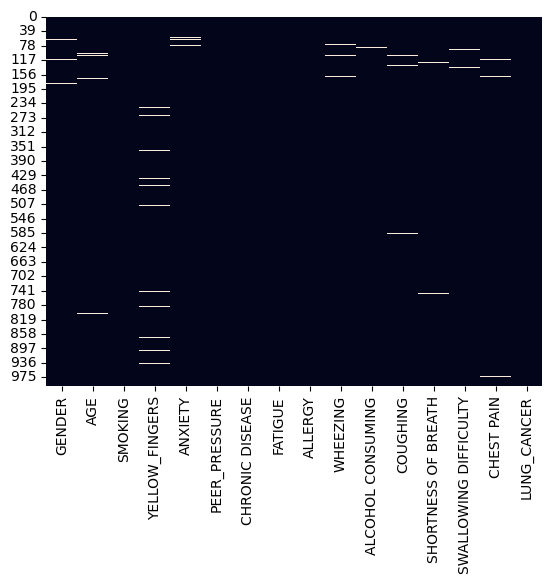

In [4]:
#using visualization for showing missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()


Missing Values Now:
GENDER                   0
AGE                      0
SMOKING                  1
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          3
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


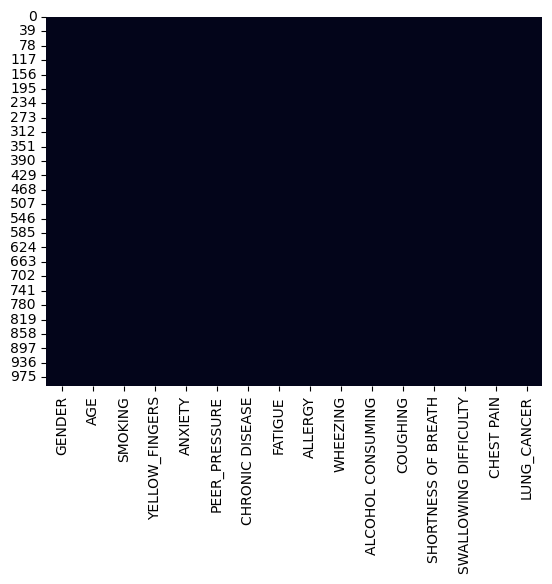

In [5]:
# Data preprocessing
#Handle Missing Data
simple_imputer = SimpleImputer(strategy = 'mean')
missing_col = ['AGE']
df[missing_col] = simple_imputer.fit_transform(df[missing_col])

simple_imputer = SimpleImputer(strategy = 'most_frequent')
missing_col = ['GENDER','YELLOW_FINGERS','ANXIETY','WHEEZING','ALCOHOL CONSUMING','PEER_PRESSURE','FATIGUE','ALLERGY','COUGHING','SHORTNESS OF BREATH','CHEST PAIN','SWALLOWING DIFFICULTY']
df[missing_col] = simple_imputer.fit_transform(df[missing_col])

print("Missing Values Now:")
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [6]:
#Encoding Categorical data
label_Encoder = LabelEncoder()

cols_to_encode = ['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']
for col in cols_to_encode:
    df[col] = label_Encoder.fit_transform(df[col])

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,61.866734,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74.000000,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59.000000,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63.000000,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63.000000,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,78.000000,1,1,1,1,0,1,0,1,0,1,1,1,0,1
996,0,64.000000,1,1,1,1,1,1,1,1,0,1,1,1,1,1
997,0,58.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0
998,0,57.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
import pandas as pd

#Calculate the lower and upper bounds
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

#Calculate the lower and 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)
#Identifying outliers
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]

print("Outliers detected")
print(outliers)

40.5
84.5
Outliers detected
     GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
238       0  38.0        0               1        0              0   
261       1  39.0        1               0        0              1   
277       0  87.0        0               0        0              0   
387       0  36.0        1               0        0              0   
388       0  27.0        1               0        0              0   
399       0  36.0        0               0        0              0   
465       0  86.0        0               0        0              0   
515       0  28.0        0               0        0              0   
526       0  38.0        0               0        0              0   
579       0  36.0        1               0        0              0   
593       0  36.0        1               0        0              0   
781       0  28.0        0               0        0              0   
828       0  36.0        0               0        0           

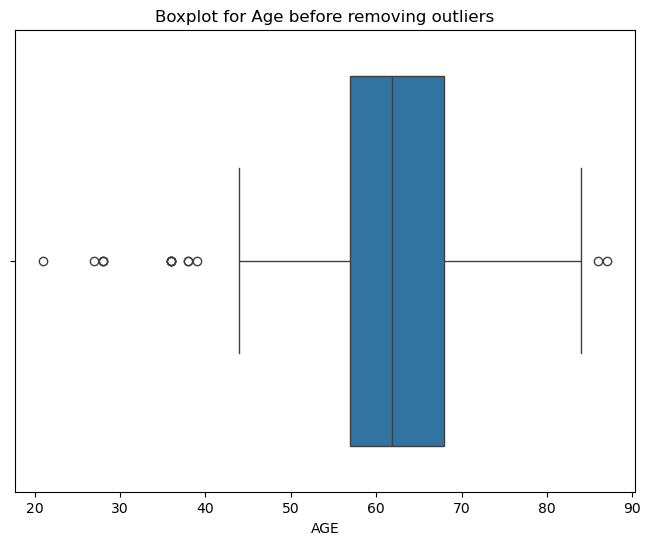

In [8]:
# Plotting the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AGE'])
plt.title("Boxplot for Age before removing outliers")
plt.show()

In [9]:
# Cap the values at the lower and upper bounds
df['AGE'] = df['AGE'].clip(lower=lower_bound, upper=upper_bound)

# Check the result
print(df['AGE'].describe())


count    1000.000000
mean       61.962234
std         7.282765
min        40.500000
25%        57.000000
50%        61.866734
75%        68.000000
max        84.500000
Name: AGE, dtype: float64


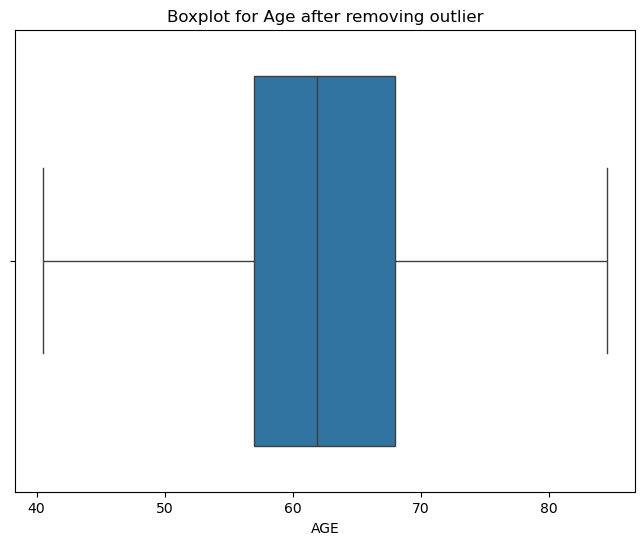

In [10]:
# Create a boxplot for 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AGE'])
plt.title("Boxplot for Age after removing outlier")
plt.show()


In [11]:
#Feature Scaling
FeatureScal_col = ['AGE']
Minmax = MinMaxScaler()
df[FeatureScal_col] = Minmax.fit_transform(df[FeatureScal_col])
print("Normalised Data:")
print(df[FeatureScal_col].head())
df

Normalised Data:
        AGE
0  0.485608
1  0.761364
2  0.420455
3  0.511364
4  0.511364


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.485608,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0.761364,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0.420455,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.511364,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.511364,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.852273,1,1,1,1,0,1,0,1,0,1,1,1,0,1
996,0,0.534091,1,1,1,1,1,1,1,1,0,1,1,1,1,1
997,0,0.397727,0,0,0,0,0,1,0,0,0,0,1,0,0,0
998,0,0.375000,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print()

Column: GENDER
[1 0]

Column: AGE
[0.4856076  0.76136364 0.42045455 0.51136364 0.78409091 0.26136364
 0.23863636 0.625      0.28409091 0.46590909 0.71590909 0.44318182
 0.39772727 0.64772727 0.17045455 0.375      0.07954545 0.53409091
 0.55681818 0.32954545 0.48863636 0.35227273 0.60227273 0.82954545
 0.67045455 0.30681818 0.19318182 0.73863636 0.14772727 0.69318182
 0.57954545 0.80681818 0.85227273 0.92045455 0.875      0.
 1.         0.125      0.96590909 0.21590909 0.98863636 0.89772727]

Column: SMOKING
[0 1 2]

Column: YELLOW_FINGERS
[1 0]

Column: ANXIETY
[1 0]

Column: PEER_PRESSURE
[0 1]

Column: CHRONIC DISEASE
[0 1 2]

Column: FATIGUE
[1 0]

Column: ALLERGY
[0 1]

Column: WHEEZING
[1 0]

Column: ALCOHOL CONSUMING
[1 0]

Column: COUGHING
[1 0]

Column: SHORTNESS OF BREATH
[1 0]

Column: SWALLOWING DIFFICULTY
[1 0]

Column: CHEST PAIN
[1 0]

Column: LUNG_CANCER
[1 0]



In [13]:
#Splitting to train and test

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (800, 15)
Test set size: (200, 15)


In [14]:
df.to_csv('lungCancer_data_preprocessed.csv', index=False)


In [15]:
#five number summary

column_name ='AGE'
summary = {
    'Minimum' : df[column_name].min(),
    'Q1' : df[column_name].quantile(0.25),
    'Median' : df[column_name].median(),
    'Q3' : df[column_name].quantile(0.75),
    'Maximum' : df[column_name].max()
}

#printing out the result
print(f"Five-number Summary for '{column_name}':")
for key, value in summary.items():
    print(f"{key}:{value}")


Five-number Summary for 'AGE':
Minimum:0.0
Q1:0.3749999999999999
Median:0.48560760196060293
Q3:0.6249999999999999
Maximum:0.9999999999999999


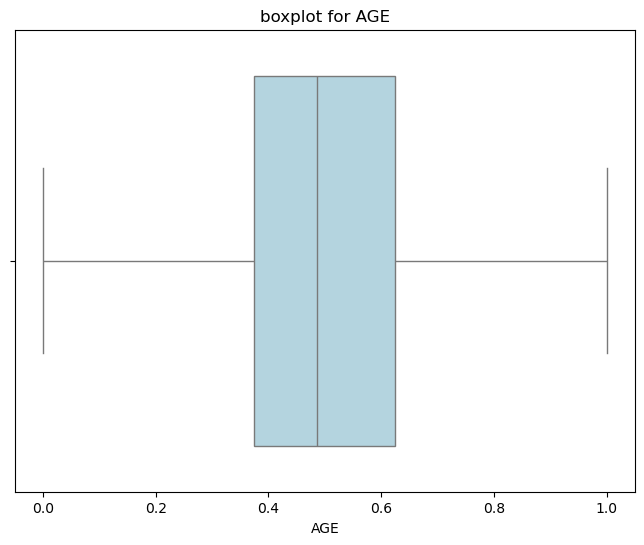

In [16]:
#boxplot for five number summary
import seaborn as sns

#create a boxplot for the 'Age' column
plt.figure(figsize=(8,6))
sns.boxplot(x=df['AGE'], color = 'lightblue')

#set tje tile and labels
plt.title(f"boxplot for {column_name}")
plt.xlabel(column_name)

#show the plot
plt.show()


In [17]:
#training the model using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image


In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.975


In [19]:
#hyperparamter tuning
param_dist = {'n_estimators' : randint(50,500),
              'max_depth': randint(1,20)}

#create a random forest classifier
rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist,
                                 n_iter = 5,
                                 cv = 5)
#Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x758e21bc8560>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x758e21da6030>})

In [20]:
#Create a variable for the best model
best_rf = rand_search.best_estimator_

#print the best hyperparameters
print('best hyperparameters:', rand_search.best_params_)

best hyperparameters: {'max_depth': 18, 'n_estimators': 288}


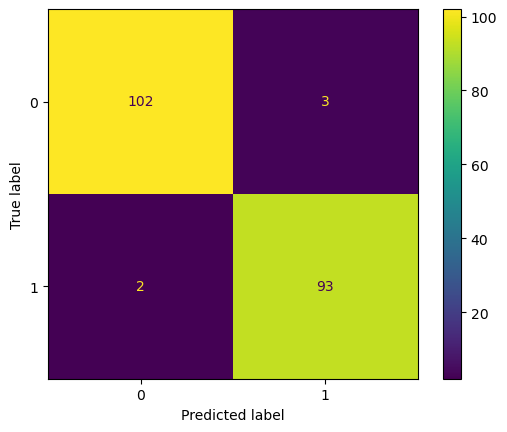

In [21]:
#Generate prediction with the best mode
y_pred = best_rf.predict(X_test)

#Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [22]:
import pickle
filename = 'model/lung_cancer_model.sav'
pickle.dump(best_rf, open(filename, 'wb'))

In [23]:
df.to_csv('data_preprocessed/lung.csv',index=False)

In [24]:
df.shape

(1000, 16)